# Installing relevenat Libraries and packages

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

import xgboost
import tensorflow as tf

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [ ]:
dataset = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

# Performing EDA

In [ ]:
dataset.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Plotting Graphs

<Axes: xlabel='Diabetes_binary', ylabel='Count'>

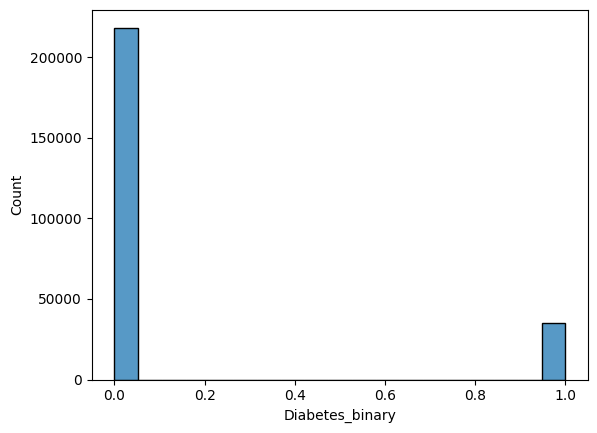

In [ ]:
sns.histplot(dataset, x='Diabetes_binary')

[Text(0.5, 1.0, 'Distribution of BMI')]

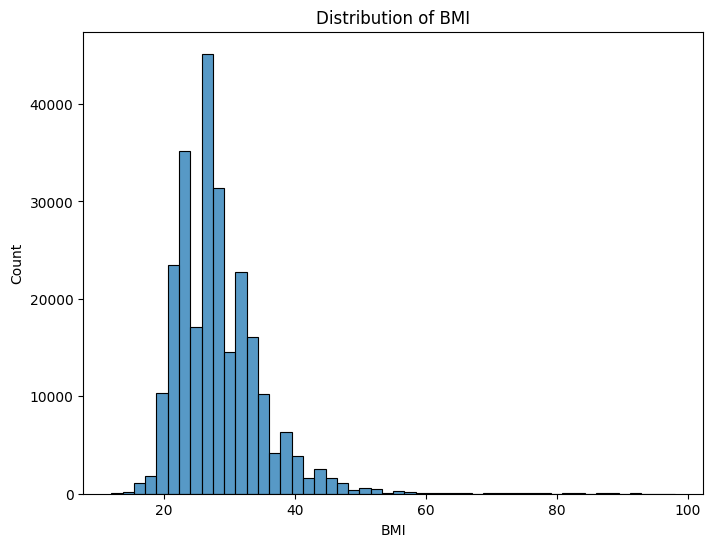

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['BMI'],bins=50).set(title='Distribution of BMI')

[Text(0.5, 1.0, 'Distribution of Age Group')]

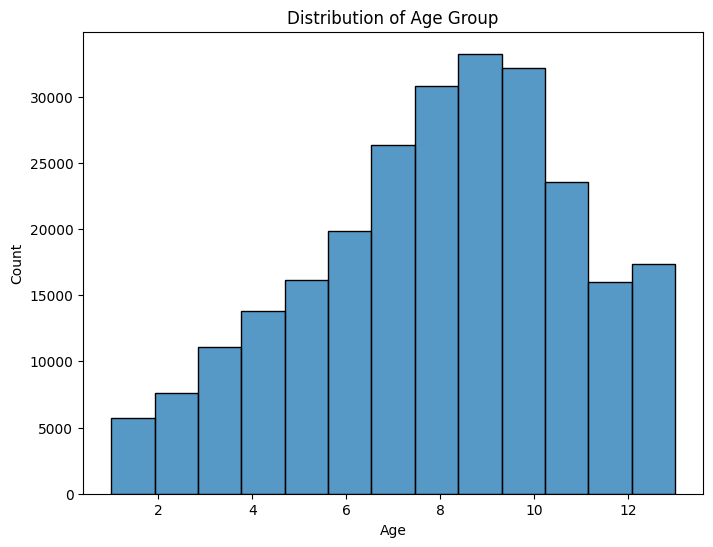

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age'], bins=13).set(title='Distribution of Age Group')

[Text(0.5, 1.0, 'Distribution of Education Group')]

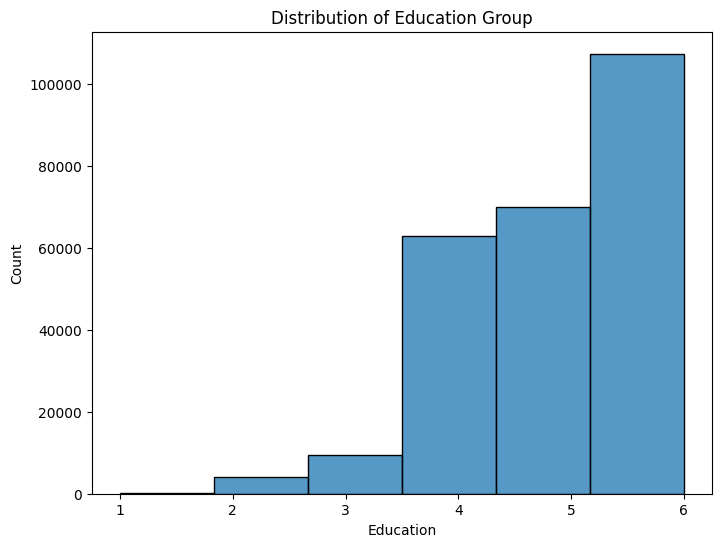

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Education'],bins=6).set(title='Distribution of Education Group')

[Text(0.5, 1.0, 'Distribution of Income Group')]

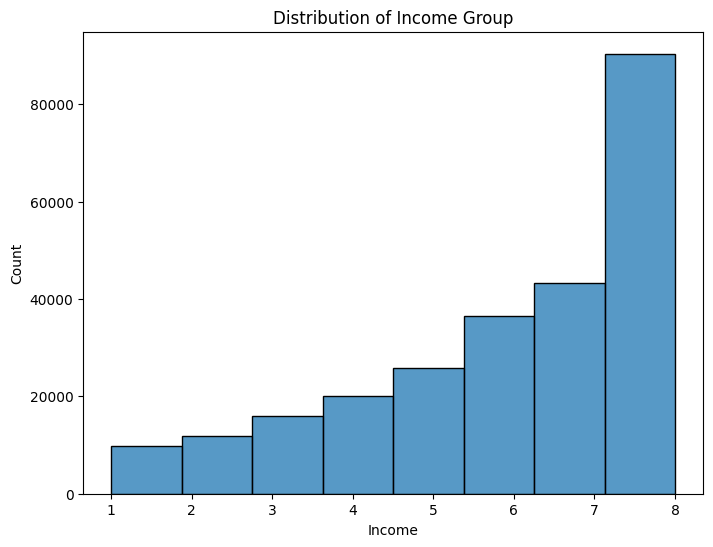

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Income'],bins=8).set(title='Distribution of Income Group')

## Removing Outliers

<ipython-input-13-f5ecac4339c7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BMI'])
<ipython-input-13-f5ecac4339c7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Age'], bins=10)


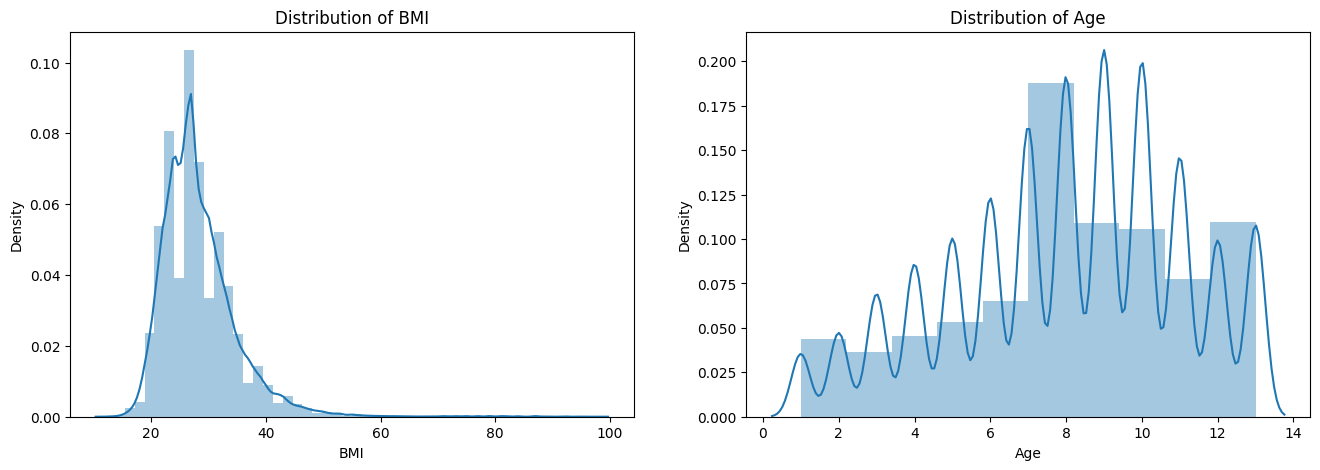

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Distribution of BMI")
sns.distplot(dataset['BMI'])
plt.subplot(1,2,2)
plt.title("Distribution of Age")
sns.distplot(dataset['Age'], bins=10)
plt.show()

[Text(0.5, 1.0, 'Box plot of BMI')]

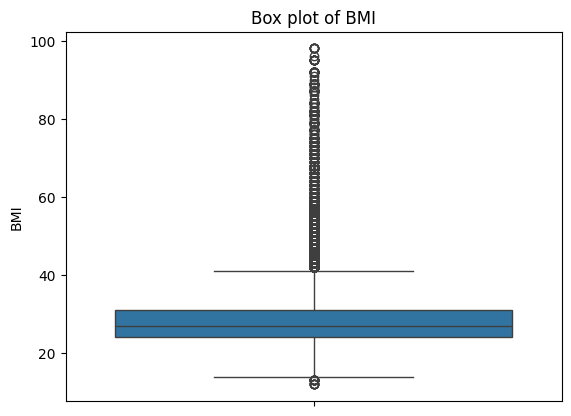

In [ ]:
sns.boxplot(dataset['BMI']).set(title='Box plot of BMI')

In [ ]:
percentile25 = dataset['BMI'].quantile(0.25)
percentile75 = dataset['BMI'].quantile(0.75)
iqr = percentile75 - percentile25

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
dataset[dataset['BMI'] > upper_limit]
dataset[dataset['BMI'] < lower_limit]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
38979,0.0,1.0,1.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,30.0,30.0,1.0,0.0,10.0,5.0,1.0
40601,0.0,0.0,0.0,1.0,13.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,2.0,1.0,1.0,5.0,6.0,3.0
49827,0.0,0.0,0.0,1.0,12.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,0.0,1.0,0.0,1.0,9.0,2.0,8.0
79789,0.0,0.0,1.0,1.0,13.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,7.0,0.0,0.0,10.0,5.0,4.0
80280,0.0,1.0,1.0,1.0,13.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.0,6.0,5.0
98002,0.0,0.0,0.0,1.0,12.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,15.0,0.0,0.0,1.0,11.0,6.0,7.0
102782,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,6.0,4.0
121195,0.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,11.0,4.0,1.0
125781,0.0,0.0,0.0,1.0,13.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,14.0,14.0,0.0,0.0,7.0,4.0,6.0
133672,1.0,0.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,2.0,1.0,1.0,6.0,4.0,8.0


In [ ]:
new_df = dataset[dataset['BMI'] < upper_limit]
new_df.shape

(243860, 22)

<ipython-input-19-4947c23e98cd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['BMI'])
<ipython-input-19-4947c23e98cd>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['BMI'])


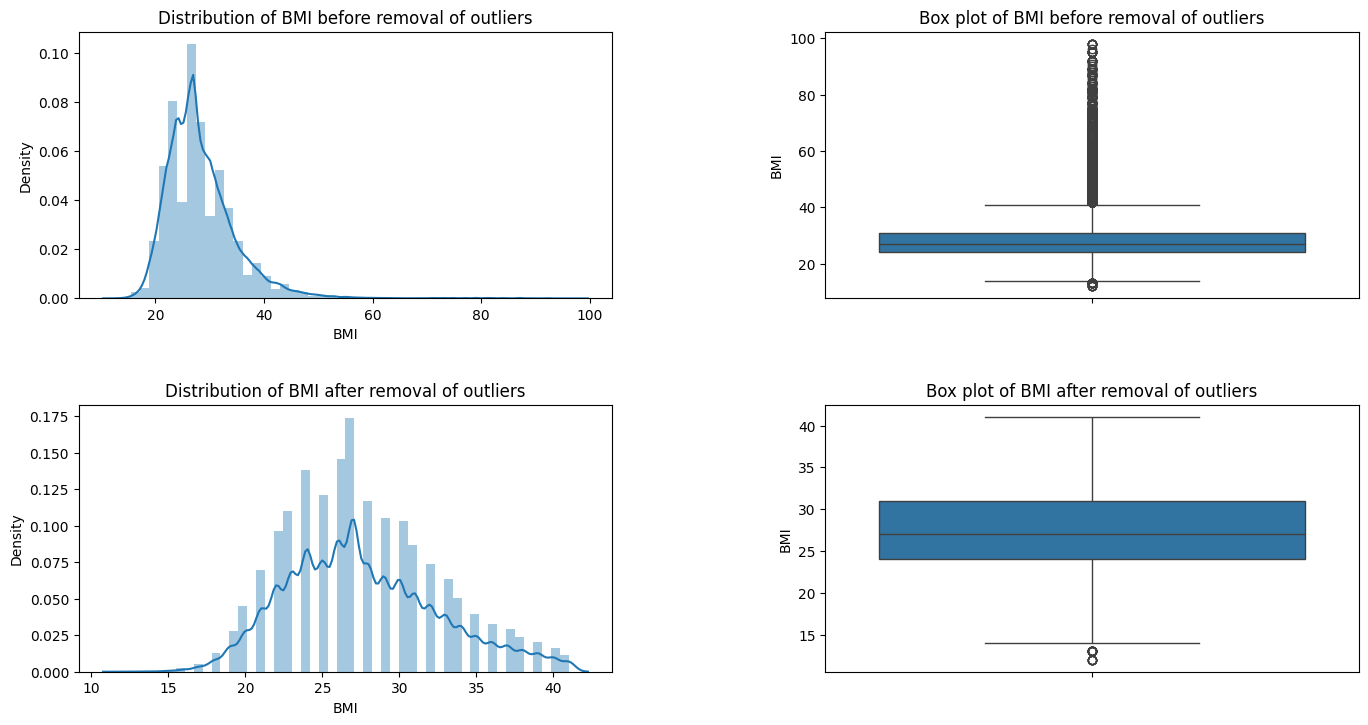

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(dataset['BMI'])
plt.title("Distribution of BMI before removal of outliers")
plt.subplot(2,2,2)
sns.boxplot(dataset['BMI'])
plt.title("Box plot of BMI before removal of outliers")

plt.subplot(2,2,3)
sns.distplot(new_df['BMI'])
plt.title("Distribution of BMI after removal of outliers")
plt.subplot(2,2,4)
sns.boxplot(new_df['BMI'])
plt.title("Box plot of BMI after removal of outliers")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

<ipython-input-20-af8248265b77>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['MentHlth'])
<ipython-input-20-af8248265b77>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['PhysHlth'])


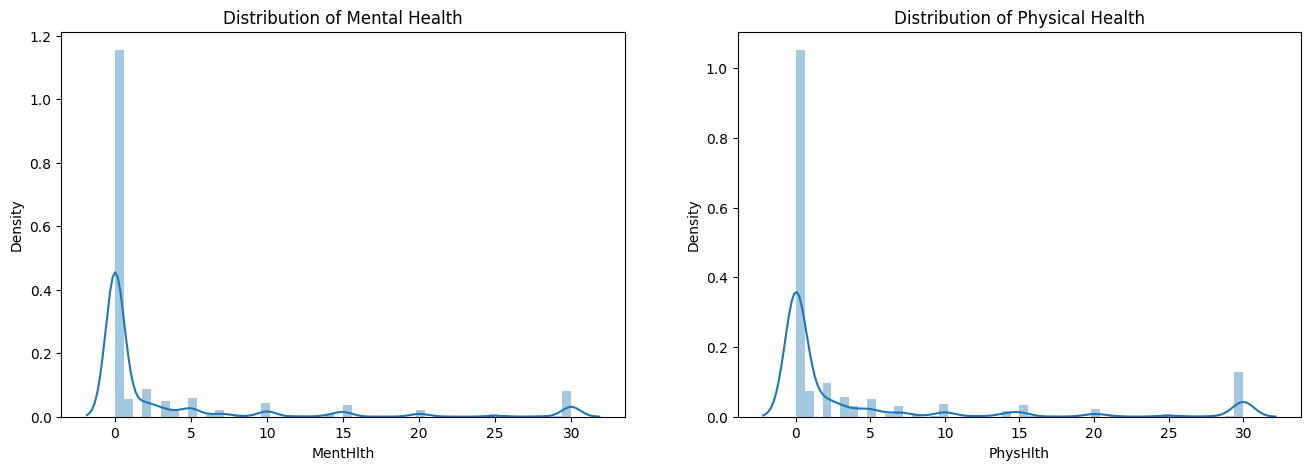

In [ ]:
# prompt: plot histogram dataset['MentHlth'] and dataset['PhysHlth']

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Distribution of Mental Health")
sns.distplot(dataset['MentHlth'])
plt.subplot(1,2,2)
plt.title("Distribution of Physical Health")
sns.distplot(dataset['PhysHlth'])
plt.show()


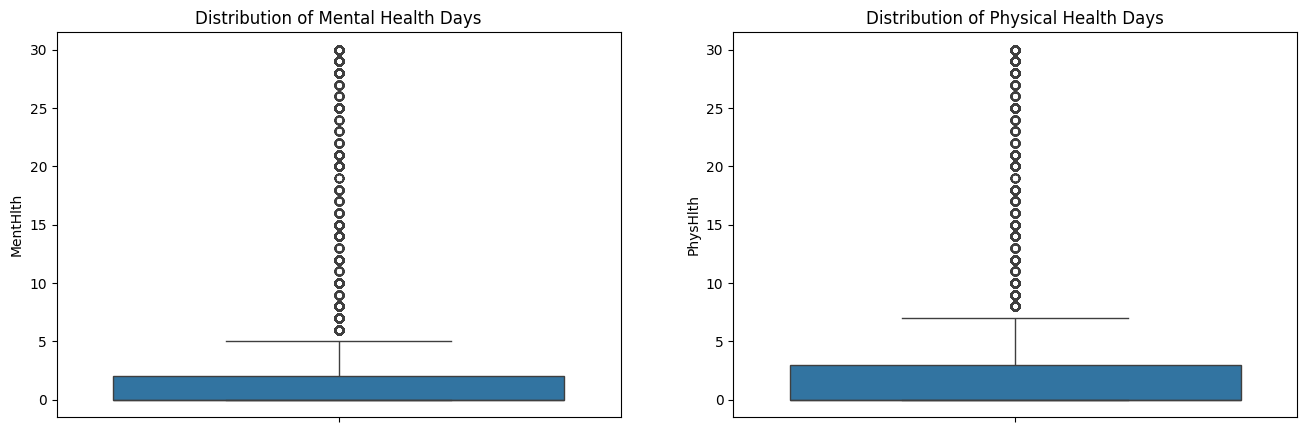

In [ ]:
# prompt: boxplot the dataset['MentHlth'] and dataset['PhysHlth']

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title("Distribution of Mental Health Days")
sns.boxplot(dataset['MentHlth'])
plt.subplot(1,2,2)
plt.title("Distribution of Physical Health Days")
sns.boxplot(dataset['PhysHlth'])
plt.show()


In [ ]:
# # remove the outlier from datatset['MenHlth'] and dataset['PhysHlth']

# # remove outlier from dataset['MenHlth']
# percentile25 = new_df['MentHlth'].quantile(0.25)
# percentile75 = new_df['MentHlth'].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr
# new_df = new_df[new_df['MentHlth'] < upper_limit]
# new_df = new_df[new_df['MentHlth'] > lower_limit]

# # remove outlier from dataset['PhysHlth']
# percentile25 = new_df['PhysHlth'].quantile(0.25)
# percentile75 = new_df['PhysHlth'].quantile(0.75)
# iqr = percentile75 - percentile25
# upper_limit = percentile75 + 1.5 * iqr
# lower_limit = percentile25 - 1.5 * iqr
# new_df = new_df[new_df['PhysHlth'] < upper_limit]
# new_df = new_df[new_df['PhysHlth'] > lower_limit]


In [ ]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,2,1)
# sns.distplot(dataset['MentHlth'])
# plt.title("Distribution of MentHlth before removal of outliers")
# plt.subplot(2,2,2)
# sns.boxplot(dataset['MentHlth'])
# plt.title("Box plot of MentHlth before removal of outliers")

# plt.subplot(2,2,3)
# sns.distplot(new_df['MentHlth'])
# plt.title("Distribution of MentHlth after removal of outliers")
# plt.subplot(2,2,4)
# sns.boxplot(new_df['MentHlth'])
# plt.title("Box plot of MentHlth after removal of outliers")
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)
# plt.show()

In [ ]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,2,1)
# sns.distplot(dataset['PhysHlth'])
# plt.title("Distribution of PhysHlth before removal of outliers")
# plt.subplot(2,2,2)
# sns.boxplot(dataset['PhysHlth'])
# plt.title("Box plot of PhysHlth before removal of outliers")

# plt.subplot(2,2,3)
# sns.distplot(new_df['PhysHlth'])
# plt.title("Distribution of PhysHlth after removal of outliers")
# plt.subplot(2,2,4)
# sns.boxplot(new_df['PhysHlth'])
# plt.title("Box plot of PhysHlth after removal of outliers")
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.4)
# plt.show()

In [ ]:
# removing NaN values

dataset = dataset.dropna()

## Finding Correlation between Independent variables

In [ ]:
new_df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.255514,0.195269,0.063192,0.212372,0.061483,0.105799,0.176213,-0.108373,-0.038091,...,0.017210,0.027579,0.281878,0.059874,0.158035,0.200151,0.039042,0.182031,-0.120023,-0.155211
HighBP,0.255514,1.000000,0.299446,0.097242,0.227146,0.099616,0.130700,0.210033,-0.119024,-0.038019,...,0.039487,0.013829,0.293877,0.051053,0.153934,0.212976,0.056668,0.351564,-0.139127,-0.166101
HighChol,0.195269,0.299446,1.000000,0.086453,0.131981,0.091971,0.092513,0.180944,-0.076087,-0.040276,...,0.043353,0.011337,0.207795,0.059872,0.118319,0.141085,0.033034,0.275261,-0.069618,-0.083331
CholCheck,0.063192,0.097242,0.086453,1.000000,0.037600,-0.010290,0.024419,0.044467,0.005441,0.024435,...,0.117635,-0.058879,0.045816,-0.010264,0.030602,0.038604,-0.021458,0.090940,0.002253,0.015796
BMI,0.212372,0.227146,0.131981,0.037600,1.000000,0.022905,0.019393,0.059415,-0.127048,-0.088587,...,-0.009590,0.043470,0.218272,0.055084,0.083581,0.151588,0.096386,-0.003361,-0.104270,-0.066093
Smoker,0.061483,0.099616,0.091971,-0.010290,0.022905,1.000000,0.062050,0.115083,-0.089524,-0.079447,...,-0.024834,0.050659,0.166899,0.092509,0.117299,0.124602,0.093996,0.122154,-0.163505,-0.126044
Stroke,0.105799,0.130700,0.092513,0.024419,0.019393,0.062050,1.000000,0.202350,-0.068899,-0.013321,...,0.009057,0.032653,0.178982,0.068401,0.148370,0.177998,0.004561,0.128100,-0.076191,-0.128385
HeartDiseaseorAttack,0.176213,0.210033,0.180944,0.044467,0.059415,0.115083,0.202350,1.000000,-0.085668,-0.019127,...,0.018798,0.029794,0.259345,0.062099,0.179895,0.212314,0.087366,0.223650,-0.099294,-0.139505
PhysActivity,-0.108373,-0.119024,-0.076087,0.005441,-0.127048,-0.089524,-0.068899,-0.085668,1.000000,0.141021,...,0.036266,-0.060182,-0.258321,-0.119674,-0.211224,-0.242056,0.027393,-0.094543,0.200122,0.195244
Fruits,-0.038091,-0.038019,-0.040276,0.024435,-0.088587,-0.079447,-0.013321,-0.019127,0.141021,1.000000,...,0.030971,-0.043059,-0.101538,-0.066623,-0.042930,-0.044881,-0.094059,0.063207,0.110038,0.078337


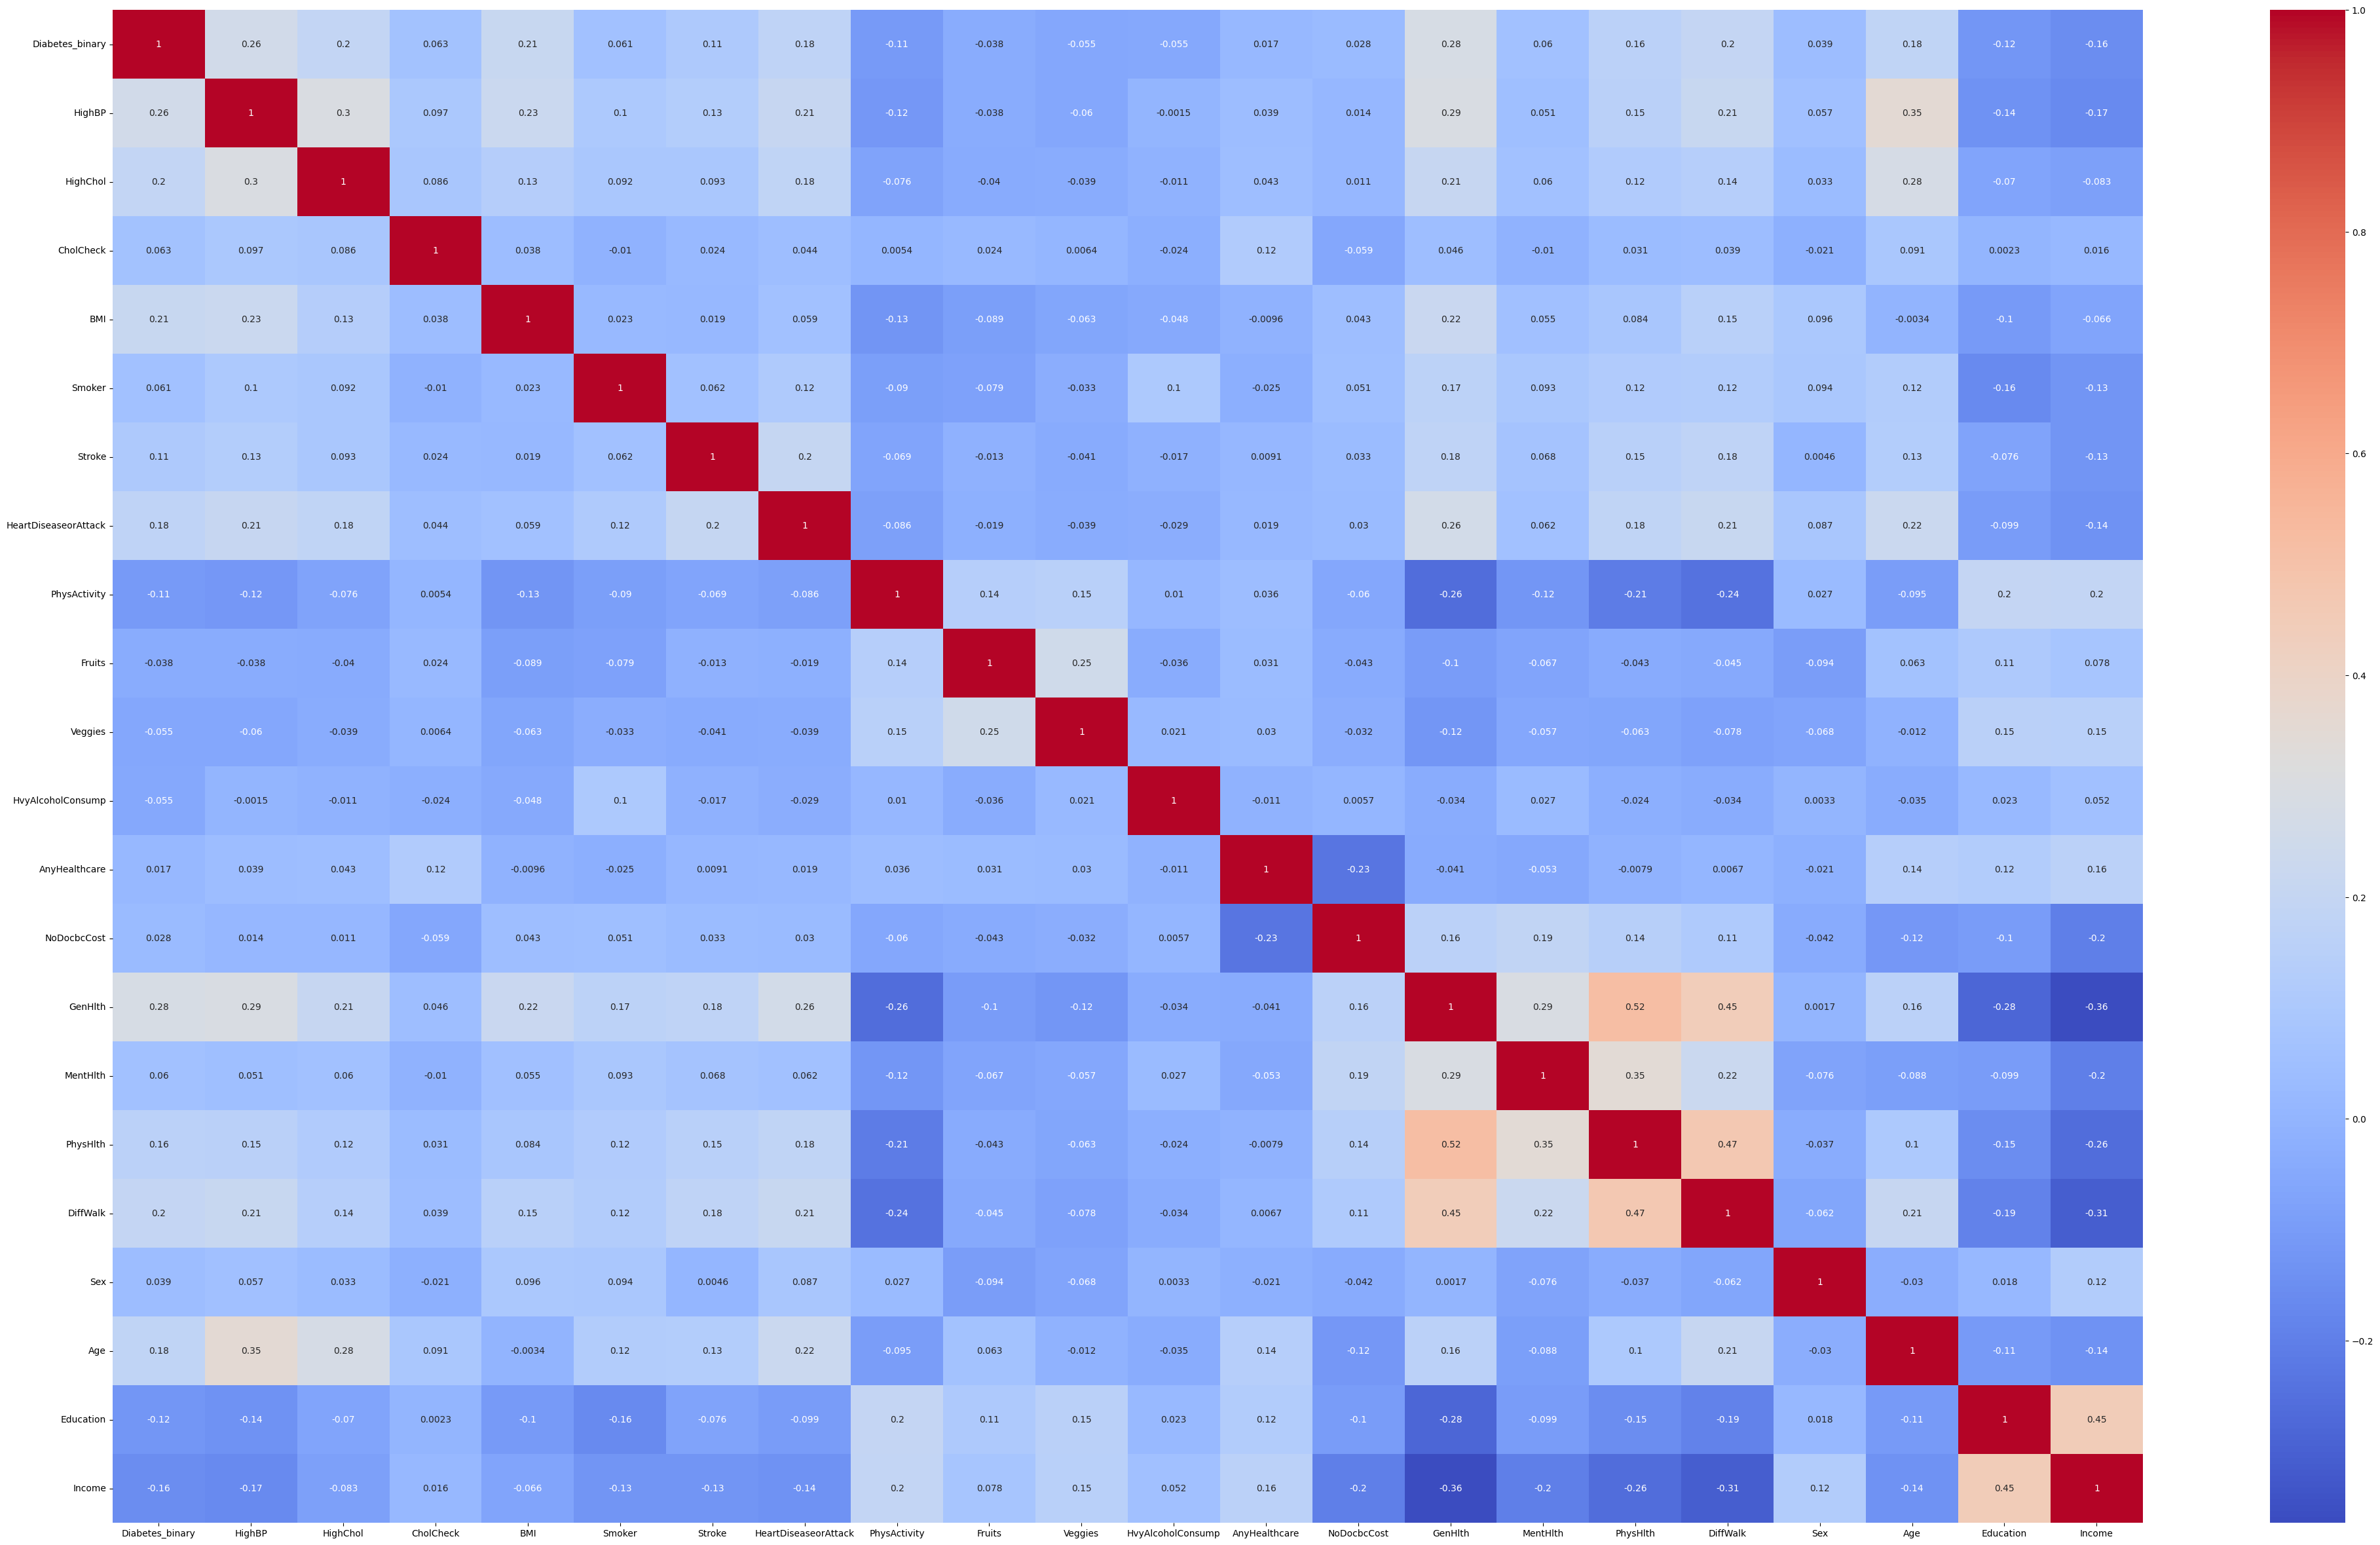

In [ ]:
# heat map

plt.figure(figsize=(50, 30))
sns.heatmap(new_df.corr(), annot=True, cmap="coolwarm")
plt.show()


## Dropping Irrelvant Columns

In [ ]:
# new_df_predicitor = new_df.drop(['Education' , 'Income'] , axis = 1)

In [ ]:
new_df_predicitor = new_df

In [ ]:
new_df_predicitor.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


<Axes: xlabel='Diabetes_binary', ylabel='Count'>

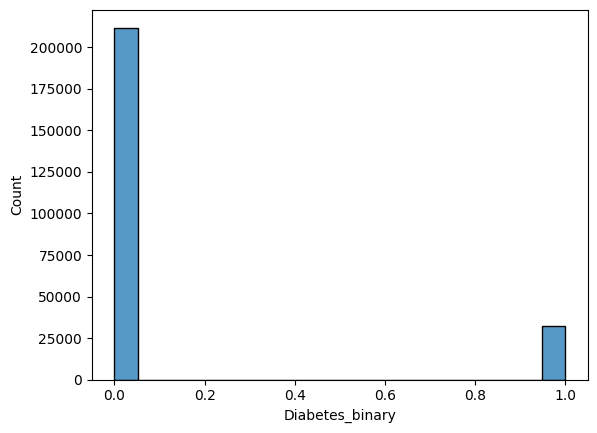

In [ ]:
sns.histplot(new_df_predicitor, x='Diabetes_binary')

In [ ]:
X = new_df_predicitor.drop(['Diabetes_binary'], axis=1)
y = new_df_predicitor['Diabetes_binary']

In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

# Feature Scaling

In [ ]:
bmi_data = X['BMI']
age = X['Age']

In [ ]:
X_scaled = X.drop(['BMI' ,'Age'] , axis = 1)

In [ ]:
X_scaled.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,4.0,3.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,4.0,8.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,5.0,4.0


In [ ]:
columns_to_scale = [bmi_data , age]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_to_scale)

In [ ]:
scaled_data

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [ ]:
# column_names= ['BMI' ,'Age', 'MentHlth','PhysHlth']
column_names= ['BMI' ,'Age']
for i in range(len(column_names)):
  X_scaled[column_names[i]] = scaled_data[i]
X_scaled.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Education,Income,BMI,Age
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,4.0,3.0,1.0,-1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,6.0,1.0,1.0,-1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,4.0,8.0,1.0,-1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,3.0,6.0,1.0,-1.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,2.0,3.0,0.0,0.0,0.0,5.0,4.0,1.0,-1.0


# Splitting the Data

In [ ]:
# prompt: train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


In [ ]:
X_train.shape

(195088, 21)

In [ ]:
X_test.shape

(48772, 21)

In [ ]:
y_train.shape

(195088,)

In [ ]:
y_test.shape


(48772,)

# Performing Sampling

## OverSampling

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X_scaled, y)

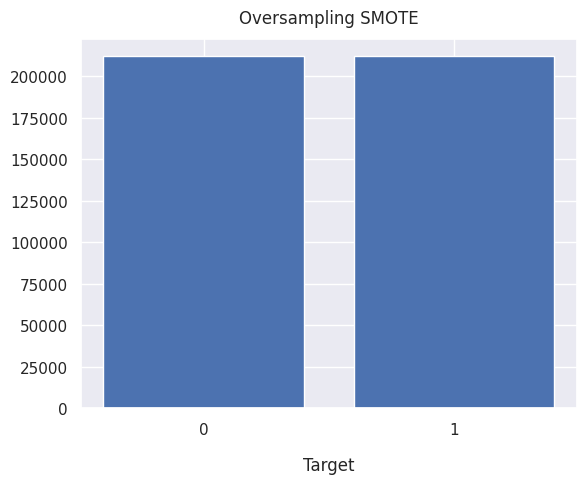

Diabetes_binary
0.0    211879
1.0    211879
Name: count, dtype: int64

In [ ]:
# Oversampling SMOTE
sns.set(font_scale=1.0)
smote_counts = y_resampled_smote.value_counts()

plt.bar(smote_counts.index, smote_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Oversampling SMOTE", y=1.02);
plt.show()

smote_counts

## Under Sampling

In [ ]:
# RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_scaled, y)

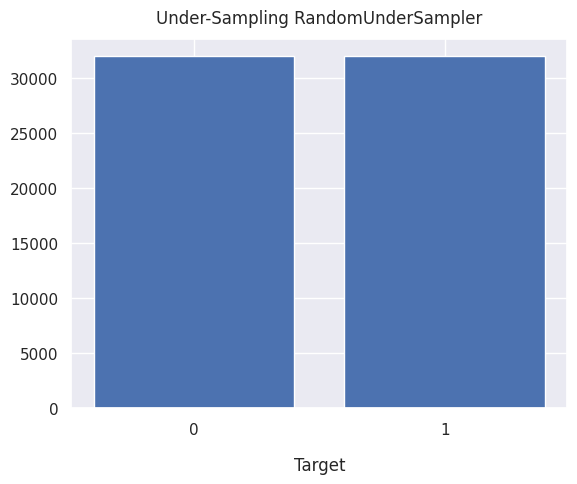

Diabetes_binary
0.0    31981
1.0    31981
Name: count, dtype: int64

In [ ]:
# Under-Sampling RandomUnderSampler
sns.set(font_scale=1.0)
rus_counts = y_resampled_rus.value_counts()

plt.bar(rus_counts.index, rus_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Under-Sampling RandomUnderSampler", y=1.02);
plt.show()

rus_counts

## Over and Under Sampling

In [ ]:
# SMOTEENN
smoteenn = SMOTEENN(random_state=42)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X_scaled, y)

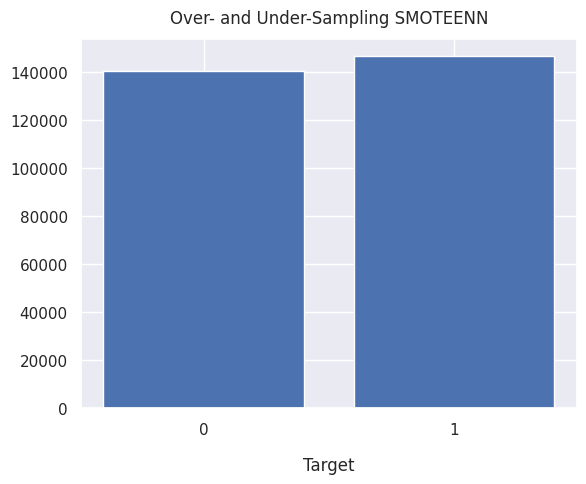

Diabetes_binary
1.0    146420
0.0    140268
Name: count, dtype: int64

In [ ]:
# Over- and Under-Sampling SMOTEENN
sns.set(font_scale=1.0)
smoteenn_counts = y_resampled_smoteenn.value_counts()

plt.bar(smoteenn_counts.index, smoteenn_counts.values)
plt.xlabel("Target", labelpad=14)
plt.xticks([0, 1])
plt.title("Over- and Under-Sampling SMOTEENN", y=1.02);
plt.show()

smoteenn_counts

In [ ]:
# Oversampling SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote,
                                                                            test_size=0.2, random_state=42)
len(X_train_smote), len(X_test_smote), len(y_train_smote), len(y_test_smote)

(339006, 84752, 339006, 84752)

In [ ]:
# Under-Sampling RandomUnderSampler
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_resampled_rus, y_resampled_rus,
                                                                    test_size=0.2, random_state=42)
len(X_train_rus), len(X_test_rus), len(y_train_rus), len(y_test_rus)

(51169, 12793, 51169, 12793)

In [ ]:
# Over- and Under-Sampling SMOTEENN
X_train_smoteenn, X_test_smoteenn, y_train_smoteenn, y_test_smoteenn = train_test_split(X_resampled_smoteenn, y_resampled_smoteenn,
                                                                    test_size=0.2, random_state=42)
len(X_train_smoteenn), len(X_test_smoteenn), len(y_train_smoteenn), len(y_test_smoteenn)

(229350, 57338, 229350, 57338)

# logistic regression

In [ ]:

# raw
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# oversampling
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# undersampling
model_rus = LogisticRegression()
model_rus.fit(X_train_rus, y_train_rus)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# over and undersampling
model_smoteenn = LogisticRegression()
model_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Raw Data
y_test_pred = model.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred))

accuracy_test = accuracy_score(y_test, y_test_pred)

print("\nTest Set Accuracy:", accuracy_test)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     42282
         1.0       0.49      0.10      0.16      6490

    accuracy                           0.87     48772
   macro avg       0.68      0.54      0.55     48772
weighted avg       0.83      0.87      0.83     48772


Test Set Accuracy: 0.8663577462478471


In [ ]:
# Over-Sampling SMOTE
y_test_pred_smote = model_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_smote))

accuracy_test_smote = accuracy_score(y_test_smote, y_test_pred_smote)

print("\nTest Set Accuracy:", accuracy_test_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.75      0.71      0.73     42421
         1.0       0.73      0.76      0.74     42331

    accuracy                           0.73     84752
   macro avg       0.74      0.73      0.73     84752
weighted avg       0.74      0.73      0.73     84752


Test Set Accuracy: 0.73493250896734


In [ ]:
# Under-Sampling RandomUnderSampler
y_test_pred_rus = model_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_rus))

accuracy_test_rus = accuracy_score(y_test_rus, y_test_pred_rus)

print("\nTest Set Accuracy:", accuracy_test_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.73      0.72      0.73      6388
         1.0       0.72      0.74      0.73      6405

    accuracy                           0.73     12793
   macro avg       0.73      0.73      0.73     12793
weighted avg       0.73      0.73      0.73     12793


Test Set Accuracy: 0.7285234112405221


In [ ]:
# Over and Under-Sampling SMTOEENN
y_test_pred_smoteenn = model_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_smoteenn))

accuracy_test_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     28028
         1.0       0.86      0.86      0.86     29310

    accuracy                           0.86     57338
   macro avg       0.86      0.86      0.86     57338
weighted avg       0.86      0.86      0.86     57338


Test Set Accuracy: 0.8571802295162022


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Raw Data
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)



DecisionTreeClassifier()

In [ ]:
# Over-Sampling SMOTE
model_tree_smote = DecisionTreeClassifier()
model_tree_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

In [ ]:
# Under-Sampling RandomUnderSampler
model_tree_rus = DecisionTreeClassifier()
model_tree_rus.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier()

In [ ]:
# Over and Under-Sampling SMOTEENN
model_tree_smoteenn = DecisionTreeClassifier()
model_tree_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

DecisionTreeClassifier()

In [ ]:
# Raw Data
y_test_pred_tree = model_tree.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_tree))

accuracy_test_tree = accuracy_score(y_test, y_test_pred_tree)

print("\nTest Set Accuracy:", accuracy_test_tree)


Test Set:
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     42282
         1.0       0.29      0.23      0.26      6490

    accuracy                           0.82     48772
   macro avg       0.59      0.57      0.58     48772
weighted avg       0.81      0.82      0.81     48772


Test Set Accuracy: 0.821947018781268


In [ ]:
# Over-Sampling SMOTE
y_test_pred_tree_smote = model_tree_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_tree_smote))

accuracy_test_tree_smote = accuracy_score(y_test_smote, y_test_pred_tree_smote)

print("\nTest Set Accuracy:", accuracy_test_tree_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86     42421
         1.0       0.87      0.84      0.85     42331

    accuracy                           0.86     84752
   macro avg       0.86      0.86      0.86     84752
weighted avg       0.86      0.86      0.86     84752


Test Set Accuracy: 0.8556258259392109


In [ ]:
# Under-Sampling RandomUnderSampler
y_test_pred_tree_rus = model_tree_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_tree_rus))

accuracy_test_tree_rus = accuracy_score(y_test_rus, y_test_pred_tree_rus)

print("\nTest Set Accuracy:", accuracy_test_tree_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.63      0.69      0.66      6388
         1.0       0.66      0.61      0.63      6405

    accuracy                           0.65     12793
   macro avg       0.65      0.65      0.65     12793
weighted avg       0.65      0.65      0.65     12793


Test Set Accuracy: 0.6458219338700852


In [ ]:

# Over and Under-Sampling SMTOEENN
y_test_pred_tree_smoteenn = model_tree_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_tree_smoteenn))

accuracy_test_tree_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_tree_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_tree_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     28028
         1.0       0.95      0.95      0.95     29310

    accuracy                           0.95     57338
   macro avg       0.95      0.95      0.95     57338
weighted avg       0.95      0.95      0.95     57338


Test Set Accuracy: 0.9471554640901322


# Random Forest


In [ ]:
# Raw Data
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Over-Sampling SMOTE
model_forest_smote = RandomForestClassifier(random_state=42)
model_forest_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
# Under-Sampling RandomUnderSampler
model_forest_rus = RandomForestClassifier(random_state=42)
model_forest_rus.fit(X_train_rus, y_train_rus)

RandomForestClassifier(random_state=42)

In [ ]:
# Over and Under-Sampling SMOTEENN
model_forest_smoteenn = RandomForestClassifier(random_state=42)
model_forest_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

RandomForestClassifier(random_state=42)

In [ ]:
# Raw Data
y_test_pred_forest = model_forest.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_forest))

accuracy_test_forest = accuracy_score(y_test, y_test_pred_forest)

print("\nTest Set Accuracy:", accuracy_test_forest)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     42282
         1.0       0.36      0.13      0.19      6490

    accuracy                           0.85     48772
   macro avg       0.62      0.55      0.56     48772
weighted avg       0.81      0.85      0.82     48772


Test Set Accuracy: 0.8540145985401459


In [ ]:
# Over-Sampling SMOTE
y_test_pred_forest_smote = model_forest_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_forest_smote))

accuracy_test_forest_smote = accuracy_score(y_test_smote, y_test_pred_forest_smote)

print("\nTest Set Accuracy:", accuracy_test_forest_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88     42421
         1.0       0.90      0.85      0.88     42331

    accuracy                           0.88     84752
   macro avg       0.88      0.88      0.88     84752
weighted avg       0.88      0.88      0.88     84752


Test Set Accuracy: 0.8805219935812724


In [ ]:
# Under-Sampling RandomUnderSampler
y_test_pred_forest_rus = model_forest_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_forest_rus))

accuracy_test_forest_rus = accuracy_score(y_test_rus, y_test_pred_forest_rus)

print("\nTest Set Accuracy:", accuracy_test_forest_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69      6388
         1.0       0.69      0.73      0.71      6405

    accuracy                           0.70     12793
   macro avg       0.70      0.70      0.70     12793
weighted avg       0.70      0.70      0.70     12793


Test Set Accuracy: 0.7023372156648167


In [ ]:
# Over and Under-Sampling SMTOEENN
y_test_pred_forest_smoteenn = model_forest_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_forest_smoteenn))

accuracy_test_forest_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_forest_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_forest_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     28028
         1.0       0.97      0.97      0.97     29310

    accuracy                           0.97     57338
   macro avg       0.97      0.97      0.97     57338
weighted avg       0.97      0.97      0.97     57338


Test Set Accuracy: 0.9659736998151314


# XGBoost

In [ ]:
# Raw Data
from xgboost import XGBClassifier
model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Over-Sampling SMOTE
model_xgboost_smote = XGBClassifier(random_state=42)
model_xgboost_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Under-Sampling RandomUnderSampler
model_xgboost_rus = XGBClassifier(random_state=42)
model_xgboost_rus.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Over and Under-Sampling SMOTEENN
model_xgboost_smoteenn = XGBClassifier(random_state=42)
model_xgboost_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Raw Data
y_test_pred_xgboost = model_xgboost.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_xgboost))

accuracy_test_xgboost = accuracy_score(y_test, y_test_pred_xgboost)

print("\nTest Set Accuracy:", accuracy_test_xgboost)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     42282
         1.0       0.52      0.08      0.14      6490

    accuracy                           0.87     48772
   macro avg       0.70      0.54      0.54     48772
weighted avg       0.83      0.87      0.82     48772


Test Set Accuracy: 0.8675879603050931


In [ ]:
# Over-Sampling SMOTE
y_test_pred_xgboost_smote = model_xgboost_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_xgboost_smote))

accuracy_test_xgboost_smote = accuracy_score(y_test_smote, y_test_pred_xgboost_smote)

print("\nTest Set Accuracy:", accuracy_test_xgboost_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88     42421
         1.0       0.92      0.81      0.87     42331

    accuracy                           0.87     84752
   macro avg       0.88      0.87      0.87     84752
weighted avg       0.88      0.87      0.87     84752


Test Set Accuracy: 0.8734779120256749


In [ ]:
# Under-Sampling RandomUnderSampler
y_test_pred_xgboost_rus = model_xgboost_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_xgboost_rus))

accuracy_test_xgboost_rus = accuracy_score(y_test_rus, y_test_pred_xgboost_rus)

print("\nTest Set Accuracy:", accuracy_test_xgboost_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.75      0.68      0.72      6388
         1.0       0.71      0.78      0.74      6405

    accuracy                           0.73     12793
   macro avg       0.73      0.73      0.73     12793
weighted avg       0.73      0.73      0.73     12793


Test Set Accuracy: 0.7290705854764324


In [ ]:
# Over and Under-Sampling SMTOEENN
y_test_pred_xgboost_smoteenn = model_xgboost_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_xgboost_smoteenn))

accuracy_test_xgboost_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_xgboost_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_xgboost_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95     28028
         1.0       0.96      0.95      0.96     29310

    accuracy                           0.95     57338
   macro avg       0.95      0.95      0.95     57338
weighted avg       0.95      0.95      0.95     57338


Test Set Accuracy: 0.9546722941155953


# KNN

In [ ]:
# Raw Data
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Over-Sampling SMOTE
model_knn_smote = KNeighborsClassifier()
model_knn_smote.fit(X_train_smote, y_train_smote)

KNeighborsClassifier()

In [ ]:
# Under-Sampling RandomUnderSampler
model_knn_rus = KNeighborsClassifier()
model_knn_rus.fit(X_train_rus, y_train_rus)

KNeighborsClassifier()

In [ ]:
# Over and Under-Sampling SMOTEENN
model_knn_smoteenn = KNeighborsClassifier()
model_knn_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

KNeighborsClassifier()

In [ ]:
# Raw Data
y_test_pred_knn = model_knn.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_knn))

accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

print("\nTest Set Accuracy:", accuracy_test_knn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     42282
         1.0       0.35      0.14      0.20      6490

    accuracy                           0.85     48772
   macro avg       0.61      0.55      0.56     48772
weighted avg       0.81      0.85      0.82     48772


Test Set Accuracy: 0.8505289920446157


In [ ]:
# Over-Sampling SMOTE
y_test_pred_knn_smote = model_knn_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_knn_smote))

accuracy_test_knn_smote = accuracy_score(y_test_smote, y_test_pred_knn_smote)

print("\nTest Set Accuracy:", accuracy_test_knn_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79     42421
         1.0       0.77      0.87      0.82     42331

    accuracy                           0.80     84752
   macro avg       0.81      0.80      0.80     84752
weighted avg       0.81      0.80      0.80     84752


Test Set Accuracy: 0.8033910704172172


In [ ]:
# Under-Sampling RandomUnderSampler
y_test_pred_knn_rus = model_knn_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_knn_rus))

accuracy_test_knn_rus = accuracy_score(y_test_rus, y_test_pred_knn_rus)

print("\nTest Set Accuracy:", accuracy_test_knn_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.70      0.66      0.68      6388
         1.0       0.68      0.71      0.69      6405

    accuracy                           0.69     12793
   macro avg       0.69      0.69      0.69     12793
weighted avg       0.69      0.69      0.69     12793


Test Set Accuracy: 0.6874071757992652


In [ ]:
# Over and Under-Sampling SMTOEENN
y_test_pred_knn_smoteenn = model_knn_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_knn_smoteenn))

accuracy_test_knn_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_knn_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_knn_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95     28028
         1.0       0.93      0.97      0.95     29310

    accuracy                           0.95     57338
   macro avg       0.95      0.95      0.95     57338
weighted avg       0.95      0.95      0.95     57338


Test Set Accuracy: 0.9503121838920088


# Catboost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.8 MB/s eta 0:00:00


In [ ]:
# Raw Data
from catboost import CatBoostClassifier

model_catboost = CatBoostClassifier(random_state=42)
model_catboost.fit(X_train, y_train)

Learning rate set to 0.097918
0:	learn: 0.6012416	total: 149ms	remaining: 2m 28s
1:	learn: 0.5329331	total: 256ms	remaining: 2m 7s
2:	learn: 0.4859275	total: 371ms	remaining: 2m 3s
3:	learn: 0.4463218	total: 473ms	remaining: 1m 57s
4:	learn: 0.4203515	total: 592ms	remaining: 1m 57s
5:	learn: 0.3971041	total: 757ms	remaining: 2m 5s
6:	learn: 0.3816457	total: 889ms	remaining: 2m 6s
7:	learn: 0.3692748	total: 1.05s	remaining: 2m 10s
8:	learn: 0.3612648	total: 1.19s	remaining: 2m 11s
9:	learn: 0.3517190	total: 1.34s	remaining: 2m 12s
10:	learn: 0.3471245	total: 1.51s	remaining: 2m 16s
11:	learn: 0.3415328	total: 1.67s	remaining: 2m 17s
12:	learn: 0.3373133	total: 1.87s	remaining: 2m 22s
13:	learn: 0.3341756	total: 2.02s	remaining: 2m 22s
14:	learn: 0.3310459	total: 2.23s	remaining: 2m 26s
15:	learn: 0.3283822	total: 2.47s	remaining: 2m 31s
16:	learn: 0.3263721	total: 2.63s	remaining: 2m 31s
17:	learn: 0.3248174	total: 2.85s	remaining: 2m 35s
18:	learn: 0.3235060	total: 2.98s	remaining: 2m 

In [ ]:
# Over-Sampling SMOTE
model_catboost_smote = CatBoostClassifier(random_state=42)
model_catboost_smote.fit(X_train_smote, y_train_smote)

Learning rate set to 0.123975
0:	learn: 0.6182530	total: 123ms	remaining: 2m 2s
1:	learn: 0.5745061	total: 221ms	remaining: 1m 50s
2:	learn: 0.5478844	total: 311ms	remaining: 1m 43s
3:	learn: 0.5199033	total: 397ms	remaining: 1m 38s
4:	learn: 0.5038527	total: 485ms	remaining: 1m 36s
5:	learn: 0.4891359	total: 575ms	remaining: 1m 35s
6:	learn: 0.4707003	total: 780ms	remaining: 1m 50s
7:	learn: 0.4521692	total: 958ms	remaining: 1m 58s
8:	learn: 0.4415184	total: 1.24s	remaining: 2m 16s
9:	learn: 0.4354960	total: 1.53s	remaining: 2m 31s
10:	learn: 0.4304019	total: 1.81s	remaining: 2m 43s
11:	learn: 0.4241339	total: 2.02s	remaining: 2m 45s
12:	learn: 0.4185129	total: 2.21s	remaining: 2m 48s
13:	learn: 0.4076790	total: 2.4s	remaining: 2m 49s
14:	learn: 0.3979970	total: 2.63s	remaining: 2m 52s
15:	learn: 0.3874854	total: 2.87s	remaining: 2m 56s
16:	learn: 0.3833701	total: 3.05s	remaining: 2m 56s
17:	learn: 0.3738136	total: 3.14s	remaining: 2m 51s
18:	learn: 0.3712448	total: 3.23s	remaining: 2

In [ ]:
# Under-Sampling RandomUnderSampler
model_catboost_rus = CatBoostClassifier(random_state=42)
model_catboost_rus.fit(X_train_rus, y_train_rus)

Learning rate set to 0.055294
0:	learn: 0.6753882	total: 12.5ms	remaining: 12.5s
1:	learn: 0.6605539	total: 30.1ms	remaining: 15s
2:	learn: 0.6473318	total: 42.9ms	remaining: 14.2s
3:	learn: 0.6350204	total: 55.1ms	remaining: 13.7s
4:	learn: 0.6249043	total: 67.4ms	remaining: 13.4s
5:	learn: 0.6157956	total: 79.6ms	remaining: 13.2s
6:	learn: 0.6074928	total: 92.3ms	remaining: 13.1s
7:	learn: 0.6009206	total: 104ms	remaining: 12.9s
8:	learn: 0.5944303	total: 116ms	remaining: 12.8s
9:	learn: 0.5885679	total: 129ms	remaining: 12.8s
10:	learn: 0.5838341	total: 142ms	remaining: 12.7s
11:	learn: 0.5792585	total: 154ms	remaining: 12.7s
12:	learn: 0.5750932	total: 167ms	remaining: 12.7s
13:	learn: 0.5712618	total: 179ms	remaining: 12.6s
14:	learn: 0.5682764	total: 193ms	remaining: 12.7s
15:	learn: 0.5653315	total: 210ms	remaining: 12.9s
16:	learn: 0.5627647	total: 223ms	remaining: 12.9s
17:	learn: 0.5602936	total: 245ms	remaining: 13.3s
18:	learn: 0.5580209	total: 258ms	remaining: 13.3s
19:	le

In [ ]:
# Over and Under-Sampling SMOTEENN
model_catboost_smoteenn = CatBoostClassifier(random_state=42)
model_catboost_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

Learning rate set to 0.104922
0:	learn: 0.5802640	total: 71.2ms	remaining: 1m 11s
1:	learn: 0.5003773	total: 143ms	remaining: 1m 11s
2:	learn: 0.4464441	total: 235ms	remaining: 1m 18s
3:	learn: 0.4064081	total: 305ms	remaining: 1m 15s
4:	learn: 0.3776366	total: 379ms	remaining: 1m 15s
5:	learn: 0.3490069	total: 453ms	remaining: 1m 15s
6:	learn: 0.3304783	total: 521ms	remaining: 1m 13s
7:	learn: 0.3116102	total: 590ms	remaining: 1m 13s
8:	learn: 0.2963978	total: 689ms	remaining: 1m 15s
9:	learn: 0.2829967	total: 762ms	remaining: 1m 15s
10:	learn: 0.2748316	total: 829ms	remaining: 1m 14s
11:	learn: 0.2636648	total: 908ms	remaining: 1m 14s
12:	learn: 0.2561178	total: 983ms	remaining: 1m 14s
13:	learn: 0.2506894	total: 1.05s	remaining: 1m 13s
14:	learn: 0.2445708	total: 1.12s	remaining: 1m 13s
15:	learn: 0.2387592	total: 1.19s	remaining: 1m 13s
16:	learn: 0.2342187	total: 1.27s	remaining: 1m 13s
17:	learn: 0.2267081	total: 1.34s	remaining: 1m 13s
18:	learn: 0.2243717	total: 1.4s	remaining:

In [ ]:
# Raw Data
y_test_pred_catboost = model_catboost.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_catboost))

accuracy_test_catboost = accuracy_score(y_test, y_test_pred_catboost)

print("\nTest Set Accuracy:", accuracy_test_catboost)


Test Set:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     42282
         1.0       0.48      0.07      0.13      6490

    accuracy                           0.87     48772
   macro avg       0.68      0.53      0.53     48772
weighted avg       0.82      0.87      0.82     48772


Test Set Accuracy: 0.8662347248421225


In [ ]:
# Over-Sampling SMOTE
y_test_pred_catboost_smote = model_catboost_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_catboost_smote))

accuracy_test_catboost_smote = accuracy_score(y_test_smote, y_test_pred_catboost_smote)

print("\nTest Set Accuracy:", accuracy_test_catboost_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89     42421
         1.0       0.93      0.82      0.87     42331

    accuracy                           0.88     84752
   macro avg       0.88      0.88      0.88     84752
weighted avg       0.88      0.88      0.88     84752


Test Set Accuracy: 0.878480743817255


In [ ]:
# Under-Sampling RandomUnderSampler
y_test_pred_catboost_rus = model_catboost_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_catboost_rus))

accuracy_test_catboost_rus = accuracy_score(y_test_rus, y_test_pred_catboost_rus)

print("\nTest Set Accuracy:", accuracy_test_catboost_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.76      0.68      0.72      6388
         1.0       0.71      0.78      0.74      6405

    accuracy                           0.73     12793
   macro avg       0.73      0.73      0.73     12793
weighted avg       0.73      0.73      0.73     12793


Test Set Accuracy: 0.7319627921519581


In [ ]:
# Over and Under-Sampling SMTOEENN
y_test_pred_catboost_smoteenn = model_catboost_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_catboost_smoteenn))

accuracy_test_catboost_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_catboost_smoteenn)

print("\nTest Set Accuracy:", accuracy_test_catboost_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     28028
         1.0       0.96      0.95      0.96     29310

    accuracy                           0.96     57338
   macro avg       0.96      0.96      0.96     57338
weighted avg       0.96      0.96      0.96     57338


Test Set Accuracy: 0.9570616345181207


# Adaboost


In [ ]:
# Raw Data
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [ ]:
# Over-Sampling SMOTE
model_adaboost_smote = AdaBoostClassifier(random_state=42)
model_adaboost_smote.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(random_state=42)

In [ ]:
# Under-Sampling RandomUnderSampler
model_adaboost_rus = AdaBoostClassifier(random_state=42)
model_adaboost_rus.fit(X_train_rus, y_train_rus)

AdaBoostClassifier(random_state=42)

In [ ]:
# Over and Under-Sampling SMOTEENN
model_adaboost_smoteenn = AdaBoostClassifier(random_state=42)
model_adaboost_smoteenn.fit(X_train_smoteenn, y_train_smoteenn)

AdaBoostClassifier(random_state=42)

In [ ]:
# Raw Data
y_test_pred_adaboost = model_adaboost.predict(X_test)

print("\nTest Set:")
print(classification_report(y_test, y_test_pred_adaboost))

accuracy_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)

print("\nTest Set Accuracy:", accuracy_test_adaboost)


Test Set:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     42282
         1.0       0.47      0.10      0.17      6490

    accuracy                           0.87     48772
   macro avg       0.67      0.54      0.55     48772
weighted avg       0.82      0.87      0.83     48772


Test Set Accuracy: 0.865230050028705


In [ ]:
# Over-Sampling SMOTE
y_test_pred_adaboost_smote = model_adaboost_smote.predict(X_test_smote)

print("\nTest Set:")
print(classification_report(y_test_smote, y_test_pred_adaboost_smote))

accuracy_test_adaboost_smote = accuracy_score(y_test_smote, y_test_pred_adaboost_smote)

print("\nTest Set Accuracy:", accuracy_test_adaboost_smote)


Test Set:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80     42421
         1.0       0.79      0.82      0.81     42331

    accuracy                           0.80     84752
   macro avg       0.80      0.80      0.80     84752
weighted avg       0.80      0.80      0.80     84752


Test Set Accuracy: 0.8024943364168398


In [ ]:
# Under-Sampling RandomUnderSampler
y_test_pred_adaboost_rus = model_adaboost_rus.predict(X_test_rus)

print("\nTest Set:")
print(classification_report(y_test_rus, y_test_pred_adaboost_rus))

accuracy_test_adaboost_rus = accuracy_score(y_test_rus, y_test_pred_adaboost_rus)

print("\nTest Set Accuracy:", accuracy_test_adaboost_rus)


Test Set:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      6388
         1.0       0.72      0.75      0.74      6405

    accuracy                           0.73     12793
   macro avg       0.73      0.73      0.73     12793
weighted avg       0.73      0.73      0.73     12793


Test Set Accuracy: 0.7308684436801376


In [ ]:
# Over and Under-Sampling SMTOEENN
y_test_pred_adaboost_smoteenn = model_adaboost_smoteenn.predict(X_test_smoteenn)

print("\nTest Set:")
print(classification_report(y_test_smoteenn, y_test_pred_adaboost_smoteenn))

y_test_pred_adaboost_smoteenn = accuracy_score(y_test_smoteenn, y_test_pred_adaboost_smoteenn)

print("\nTest Set Accuracy:", y_test_pred_adaboost_smoteenn)


Test Set:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91     28028
         1.0       0.91      0.90      0.91     29310

    accuracy                           0.91     57338
   macro avg       0.91      0.91      0.91     57338
weighted avg       0.91      0.91      0.91     57338


Test Set Accuracy: 0.9077226272280163


# ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.layers import ReLU , PReLU , LeakyReLU,ELU

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
# Raw
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_ann.fit(X_train, y_train, batch_size = 20, epochs=100 ,  validation_split = 0.33 , callbacks=early_stopping)

Epoch 1/100
6536/6536 [==============================] - 27s 4ms/step - loss: 0.3166 - accuracy: 0.8692 - val_loss: 0.3160 - val_accuracy: 0.8696
Epoch 2/100
6536/6536 [==============================] - 22s 3ms/step - loss: 0.3163 - accuracy: 0.8692 - val_loss: 0.3172 - val_accuracy: 0.8696
Epoch 3/100
6536/6536 [==============================] - 21s 3ms/step - loss: 0.3164 - accuracy: 0.8692 - val_loss: 0.3174 - val_accuracy: 0.8696
Epoch 4/100
6536/6536 [==============================] - 22s 3ms/step - loss: 0.3164 - accuracy: 0.8692 - val_loss: 0.3194 - val_accuracy: 0.8696
Epoch 5/100
6536/6536 [==============================] - 23s 3ms/step - loss: 0.3163 - accuracy: 0.8692 - val_loss: 0.3164 - val_accuracy: 0.8696
Epoch 6/100
6536/6536 [==============================] - 28s 4ms/step - loss: 0.3162 - accuracy: 0.8692 - val_loss: 0.3173 - val_accuracy: 0.8696
Epoch 7/100
6536/6536 [==============================] - 22s 3ms/step - loss: 0.3162 - accuracy: 0.8692 - val_loss: 0.3174 -

In [ ]:
# over sampling
model_ann_over = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_ann_over.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_ann_over.fit(X_resampled_smote, y_resampled_smote, batch_size = 20, epochs=100 ,  validation_split = 0.33 , callbacks=early_stopping)

Epoch 1/100
14196/14196 [==============================] - 57s 4ms/step - loss: 0.4557 - accuracy: 0.7721 - val_loss: 1.0256 - val_accuracy: 0.3855
Epoch 2/100
14196/14196 [==============================] - 49s 3ms/step - loss: 0.4469 - accuracy: 0.7764 - val_loss: 0.9856 - val_accuracy: 0.3923
Epoch 3/100
14196/14196 [==============================] - 51s 4ms/step - loss: 0.4449 - accuracy: 0.7782 - val_loss: 1.0828 - val_accuracy: 0.3522
Epoch 4/100
14196/14196 [==============================] - 60s 4ms/step - loss: 0.4435 - accuracy: 0.7791 - val_loss: 0.9727 - val_accuracy: 0.4744
Epoch 5/100
14196/14196 [==============================] - 52s 4ms/step - loss: 0.4428 - accuracy: 0.7798 - val_loss: 1.0969 - val_accuracy: 0.3561
Epoch 6/100
14196/14196 [==============================] - 51s 4ms/step - loss: 0.4415 - accuracy: 0.7811 - val_loss: 1.0334 - val_accuracy: 0.4307
Epoch 7/100
14196/14196 [==============================] - 59s 4ms/step - loss: 0.4396 - accuracy: 0.7828 - val_

In [ ]:
# Under sampling
model_ann_under = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_ann_under.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_ann_under.fit(X_resampled_smote, y_resampled_smote, batch_size = 20, epochs=100 ,  validation_split = 0.33 , callbacks=early_stopping)

Epoch 1/100
14196/14196 [==============================] - 62s 4ms/step - loss: 0.5708 - accuracy: 0.7461 - val_loss: 1.3713 - val_accuracy: 0.0000e+00
Epoch 2/100
14196/14196 [==============================] - 48s 3ms/step - loss: 0.5664 - accuracy: 0.7463 - val_loss: 1.3774 - val_accuracy: 0.0000e+00
Epoch 3/100
14196/14196 [==============================] - 49s 3ms/step - loss: 0.5664 - accuracy: 0.7463 - val_loss: 1.3570 - val_accuracy: 0.0000e+00
Epoch 4/100
14196/14196 [==============================] - 61s 4ms/step - loss: 0.5664 - accuracy: 0.7463 - val_loss: 1.3611 - val_accuracy: 0.0000e+00
Epoch 5/100
14196/14196 [==============================] - 53s 4ms/step - loss: 0.5664 - accuracy: 0.7463 - val_loss: 1.3648 - val_accuracy: 0.0000e+00
Epoch 6/100
14196/14196 [==============================] - 52s 4ms/step - loss: 0.5664 - accuracy: 0.7463 - val_loss: 1.3766 - val_accuracy: 0.0000e+00
Epoch 7/100
14196/14196 [==============================] - 49s 3ms/step - loss: 0.5664 -

In [ ]:
# Over-Under sampling
model_ann_smoothen = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_ann_smoothen.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model_ann_smoothen.fit(X_resampled_smote, y_resampled_smote, batch_size = 20, epochs=100 ,  validation_split = 0.33 , callbacks=early_stopping)

Epoch 1/100
14196/14196 [==============================] - 48s 3ms/step - loss: 0.4550 - accuracy: 0.7718 - val_loss: 0.9553 - val_accuracy: 0.4534
Epoch 2/100
14196/14196 [==============================] - 55s 4ms/step - loss: 0.4461 - accuracy: 0.7779 - val_loss: 0.9318 - val_accuracy: 0.4565
Epoch 3/100
14196/14196 [==============================] - 50s 3ms/step - loss: 0.4445 - accuracy: 0.7790 - val_loss: 1.0212 - val_accuracy: 0.3930
Epoch 4/100
14196/14196 [==============================] - 48s 3ms/step - loss: 0.4434 - accuracy: 0.7793 - val_loss: 0.9784 - val_accuracy: 0.4780
Epoch 5/100
14196/14196 [==============================] - 49s 3ms/step - loss: 0.4421 - accuracy: 0.7811 - val_loss: 0.9029 - val_accuracy: 0.5005
Epoch 6/100
14196/14196 [==============================] - 53s 4ms/step - loss: 0.4405 - accuracy: 0.7827 - val_loss: 0.9333 - val_accuracy: 0.4645
Epoch 7/100
14196/14196 [==============================] - 58s 4ms/step - loss: 0.4374 - accuracy: 0.7856 - val_

In [ ]:
# Raw Data
y_test_pred_ann = model_ann.predict(X_test)

# Check the data types
if y_test.dtype != y_test_pred_ann.dtype:
    y_test = y_test.astype(y_test_pred_ann.dtype)

# Check the target values
if not np.isin(y_test, [0, 1]).all():
    y_test = binarize(y_test)

# Check the predictions
if not np.isin(y_test_pred_ann, [0, 1]).all():
    y_test_pred_ann = np.where(y_test_pred_ann > 0.5, 1, 0)

# Print the classification report
print("\nTest Set:")
print(classification_report(y_test, y_test_pred_ann))

accuracy_test_ann = accuracy_score(y_test, y_test_pred_ann)

print("\nTest Set Accuracy:", accuracy_test_ann)

1525/1525 [==============================] - 3s 2ms/step

Test Set:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     42282
         1.0       0.54      0.04      0.07      6490

    accuracy                           0.87     48772
   macro avg       0.70      0.52      0.50     48772
weighted avg       0.83      0.87      0.81     48772


Test Set Accuracy: 0.8675879603050931


In [ ]:
# Over Sampling
y_test_pred_ann_over = model_ann_over.predict(X_test)

# Check the data types
if y_test.dtype != y_test_pred_ann_over.dtype:
    y_test = y_test.astype(y_test_pred_ann_over.dtype)

# Check the target values
if not np.isin(y_test, [0, 1]).all():
    y_test = binarize(y_test)

# Check the predictions
if not np.isin(y_test_pred_ann_over, [0, 1]).all():
    y_test_pred_ann_over = np.where(y_test_pred_ann_over > 0.5, 1, 0)

# Print the classification report
print("\nTest Set:")
print(classification_report(y_test, y_test_pred_ann_over))

accuracy_test_ann_over = accuracy_score(y_test, y_test_pred_ann_over)

print("\nTest Set Accuracy:", accuracy_test_ann_over)

1525/1525 [==============================] - 3s 2ms/step

Test Set:
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     42282
         1.0       0.44      0.22      0.29      6490

    accuracy                           0.86     48772
   macro avg       0.66      0.59      0.61     48772
weighted avg       0.83      0.86      0.84     48772


Test Set Accuracy: 0.8586484048224391


In [ ]:
# Under Sampling
y_test_pred_ann_under = model_ann_under.predict(X_test)

# Check the data types
if y_test.dtype != y_test_pred_ann_under.dtype:
    y_test = y_test.astype(y_test_pred_ann_under.dtype)

# Check the target values
if not np.isin(y_test, [0, 1]).all():
    y_test = binarize(y_test)

# Check the predictions
if not np.isin(y_test_pred_ann_under, [0, 1]).all():
    y_test_pred_ann_under = np.where(y_test_pred_ann_under > 0.5, 1, 0)

# Print the classification report
print("\nTest Set:")
print(classification_report(y_test, y_test_pred_ann_under))


accuracy_test_ann_under = accuracy_score(y_test, y_test_pred_ann_under)

print("\nTest Set Accuracy:", accuracy_test_ann_under)

1525/1525 [==============================] - 2s 1ms/step

Test Set:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     42282
         1.0       0.00      0.00      0.00      6490

    accuracy                           0.87     48772
   macro avg       0.43      0.50      0.46     48772
weighted avg       0.75      0.87      0.81     48772


Test Set Accuracy: 0.8669318461412285


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Over-Under sampling
y_test_pred_ann_smoothen = model_ann_smoothen.predict(X_test)

# Check the data types
if y_test.dtype != y_test_pred_ann_smoothen.dtype:
    y_test = y_test.astype(y_test_pred_ann_smoothen.dtype)

# Check the target values
if not np.isin(y_test, [0, 1]).all():
    y_test = binarize(y_test)

# Check the predictions
if not np.isin(y_test_pred_ann_smoothen, [0, 1]).all():
    y_test_pred_ann_smoothen = np.where(y_test_pred_ann_smoothen > 0.5, 1, 0)

# Print the classification report
print("\nTest Set:")
print(classification_report(y_test, y_test_pred_ann_smoothen))


accuracy_test_ann_smoothen = accuracy_score(y_test, y_test_pred_ann_smoothen)

print("\nTest Set Accuracy:", accuracy_test_ann_smoothen)

1525/1525 [==============================] - 2s 2ms/step

Test Set:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     42282
         1.0       0.40      0.31      0.35      6490

    accuracy                           0.85     48772
   macro avg       0.65      0.62      0.63     48772
weighted avg       0.83      0.85      0.84     48772


Test Set Accuracy: 0.8455466251127696


# Comparison

In [ ]:
data = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN', 'Catboost', 'Adaboost', 'ANN'],
       'Raw data': [accuracy_test * 100, accuracy_test_tree * 100, accuracy_test_forest * 100, accuracy_test_xgboost * 100, accuracy_test_knn * 100, accuracy_test_catboost * 100, accuracy_test_adaboost * 100 , accuracy_test_ann * 100],
       'Oversampling': [accuracy_test_smote * 100, accuracy_test_tree_smote * 100, accuracy_test_forest_smote * 100, accuracy_test_xgboost_smote * 100, accuracy_test_knn_smote * 100, accuracy_test_catboost_smote * 100, accuracy_test_adaboost_smote * 100, accuracy_test_ann_over * 100],
       'Undersampling': [accuracy_test_rus * 100, accuracy_test_tree_rus * 100, accuracy_test_forest_rus * 100, accuracy_test_xgboost_rus * 100, accuracy_test_knn_rus * 100, accuracy_test_catboost_rus * 100, accuracy_test_adaboost_rus * 100 , accuracy_test_ann_under * 100],
       'Over-under sampling': [accuracy_test_smoteenn * 100, accuracy_test_tree_smoteenn * 100, accuracy_test_forest_smoteenn * 100, accuracy_test_xgboost_smoteenn * 100, accuracy_test_knn_smoteenn * 100, accuracy_test_catboost_smoteenn * 100, y_test_pred_adaboost_smoteenn * 100,accuracy_test_ann_smoothen*100]}
df = pd.DataFrame(data)
df


,Model,Raw data,Oversampling,Undersampling,Over-under sampling
0,Logistic Regression,86.635775,73.493251,72.852341,85.718023
1,Decision Tree,82.194702,85.562583,64.582193,94.715546
2,Random Forest,85.401460,88.052199,70.233722,96.597370
3,XGBoost,86.758796,87.347791,72.907059,95.467229
4,KNN,85.052899,80.339107,68.740718,95.031218
5,Catboost,86.623472,87.848074,73.196279,95.706163
6,Adaboost,86.523005,80.249434,73.086844,90.772263
7,ANN,86.758796,85.864840,86.693185,84.554663


<Axes: title={'center': 'Model Accuracy by Sampling Method'}, xlabel='Model'>

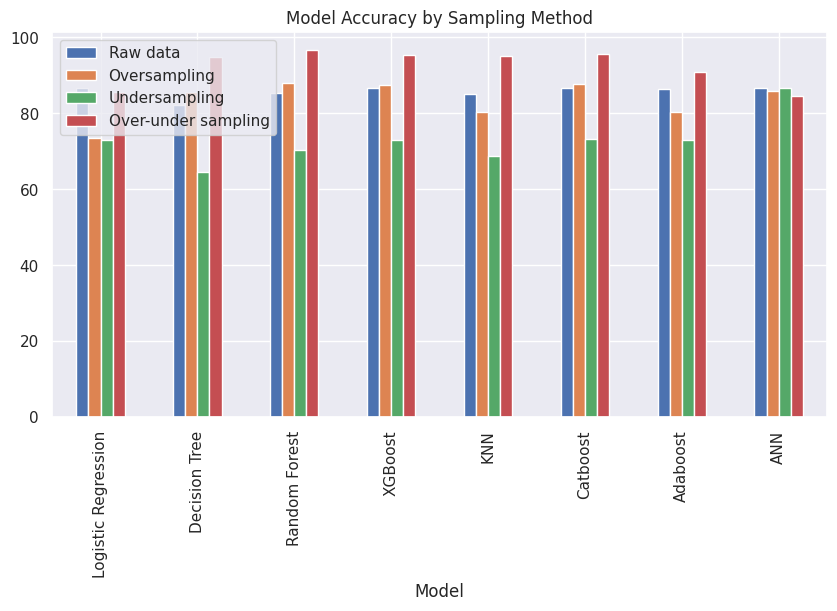

In [ ]:
df.plot.bar(x='Model', y=['Raw data', 'Oversampling', 'Undersampling', 'Over-under sampling'], title='Model Accuracy by Sampling Method', legend=True, figsize=(10, 5))
